In [2]:
import pandas as pd
import pyodbc

# Connection details (from your current setup)
server = 'group1server.database.windows.net'
database = 'DEPI_DB'
username = 'group1'
password = 'cust@g100'
driver = '{ODBC Driver 17 for SQL Server}'

# Connect to the database
conn = pyodbc.connect(
    f'DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}'
)

# Extract data into a pandas DataFrame
query = "SELECT * FROM [dbo].[telecom_customer_churn];"
df = pd.read_sql(query, conn)

# Close the connection
conn.close()

# View the data
print(df.head())


  Customer_ID  Gender  Age  Married  Number_of_Dependents          City  \
0  0002-ORFBO  Female   37     True                     0  Frazier Park   
1  0003-MKNFE    Male   46    False                     0      Glendale   
2  0004-TLHLJ    Male   50    False                     0    Costa Mesa   
3  0011-IGKFF    Male   78     True                     0      Martinez   
4  0013-EXCHZ  Female   75     True                     0     Camarillo   

   Zip_Code   Latitude   Longitude  Number_of_Referrals  ...  Monthly_Charge  \
0     93225  34.827663 -118.999069                    2  ...       65.599998   
1     91206  34.162514 -118.203873                    0  ...       -4.000000   
2     92627  33.645672 -117.922615                    0  ...       73.900002   
3     94553  38.014458 -122.115433                    1  ...       98.000000   
4     93010  34.227844 -119.079903                    3  ...       83.900002   

  Total_Charges  Total_Refunds  Total_Extra_Data_Charges  \
0    593

In [3]:
print("Data Info:")
print(df.info())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7047 entries, 0 to 7046
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer_ID                        7047 non-null   object 
 1   Gender                             7047 non-null   object 
 2   Age                                7047 non-null   int64  
 3   Married                            7047 non-null   bool   
 4   Number_of_Dependents               7047 non-null   int64  
 5   City                               7047 non-null   object 
 6   Zip_Code                           7047 non-null   int64  
 7   Latitude                           7047 non-null   float64
 8   Longitude                          7047 non-null   float64
 9   Number_of_Referrals                7047 non-null   int64  
 10  Tenure_in_Months                   7047 non-null   int64  
 11  Offer                              7047 non-n

In [39]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
               Age  Number_of_Dependents      Zip_Code     Latitude  \
count  7047.000000           7047.000000   7047.000000  7047.000000   
mean     46.498936              0.469278  93461.387683    36.198127   
std      16.751823              0.962916   2329.554700     2.469664   
min      19.000000              0.000000  10001.000000    32.555828   
25%      32.000000              0.000000  92096.000000    33.990646   
50%      46.000000              0.000000  93517.000000    36.205463   
75%      60.000000              0.000000  95329.000000    38.161320   
max      80.000000              9.000000  96150.000000    41.962128   

         Longitude  Number_of_Referrals  Tenure_in_Months  \
count  7047.000000          7047.000000       7047.000000   
mean   -119.743270             1.951611         32.378601   
std       2.287687             3.000390         24.537903   
min    -124.301369             0.000000          1.000000   
25%    -121.788094             0.0

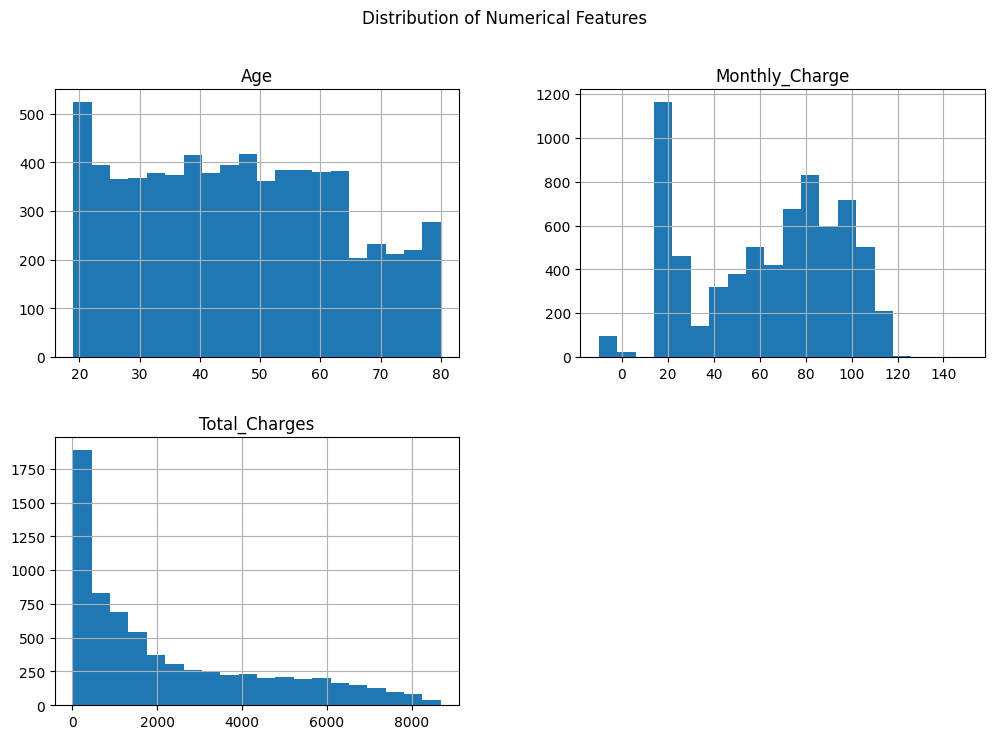

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms of numerical columns
df[['Age', 'Monthly_Charge', 'Total_Charges']].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Numerical Features')
plt.show()


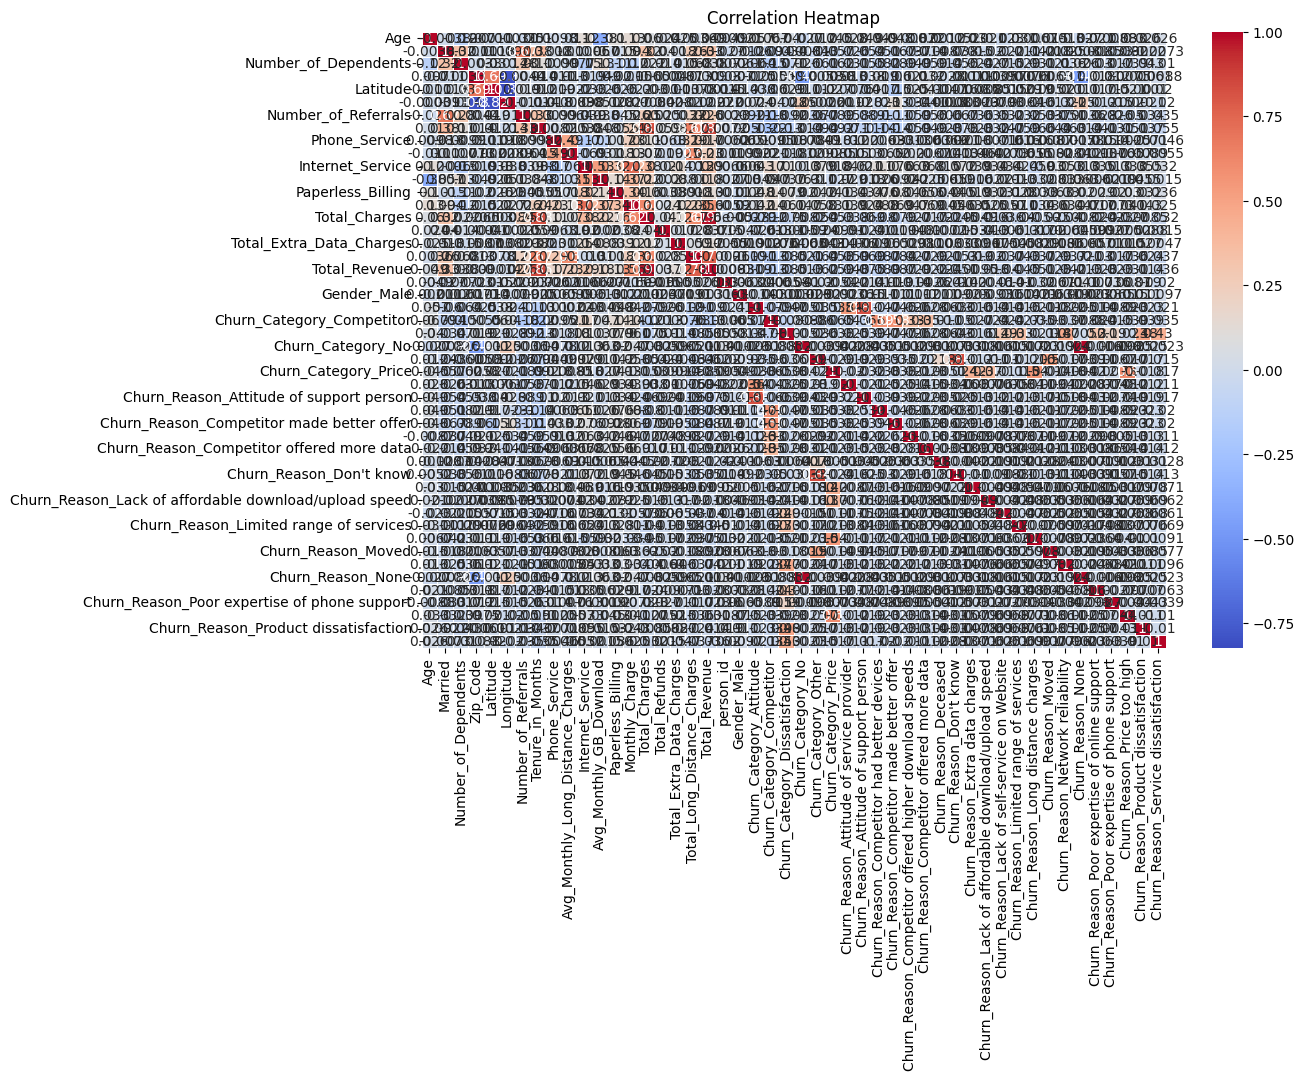

In [44]:
# Correlation matrix and heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


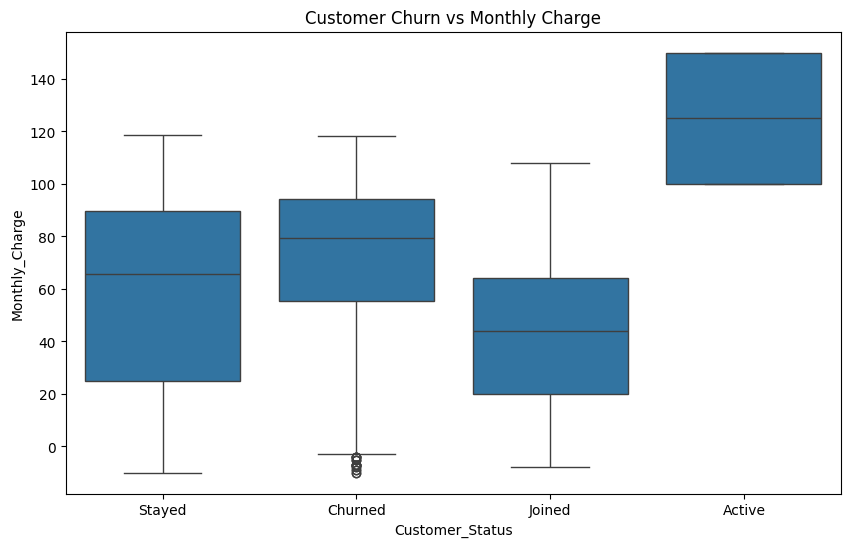

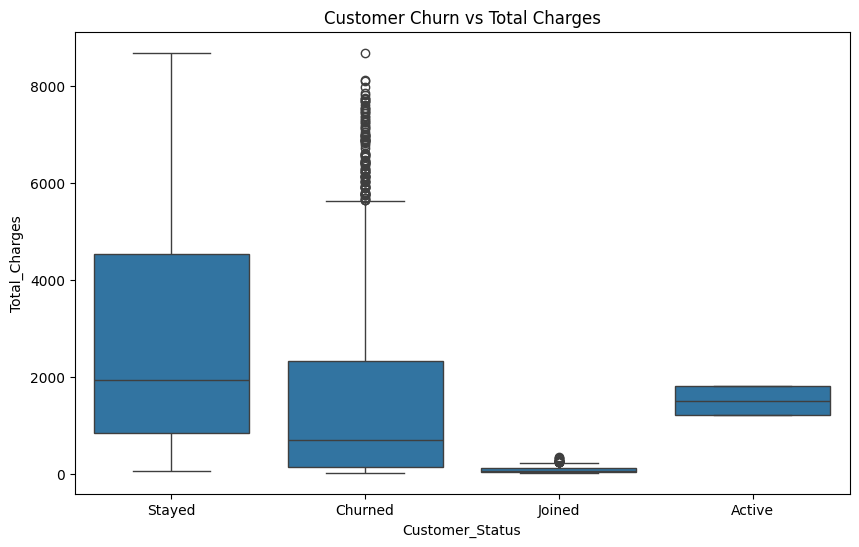

In [5]:
# Visualizing Churn vs Monthly Charge
plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer_Status', y='Monthly_Charge', data=df)
plt.title('Customer Churn vs Monthly Charge')
plt.show()

# Visualizing Churn vs Total Charges
plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer_Status', y='Total_Charges', data=df)
plt.title('Customer Churn vs Total Charges')
plt.show()


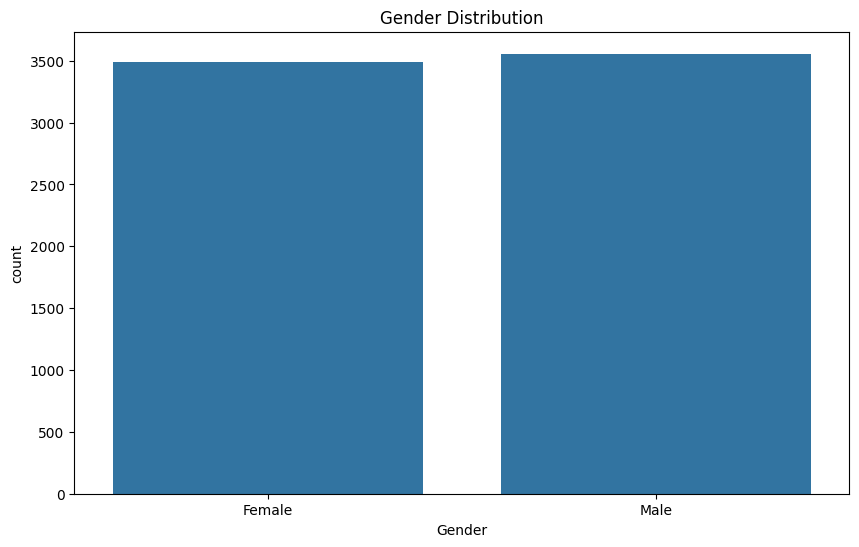

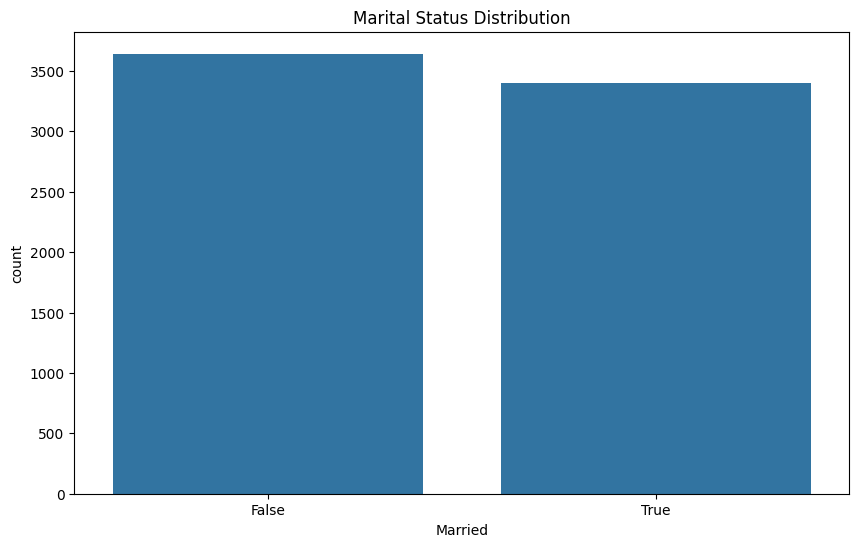

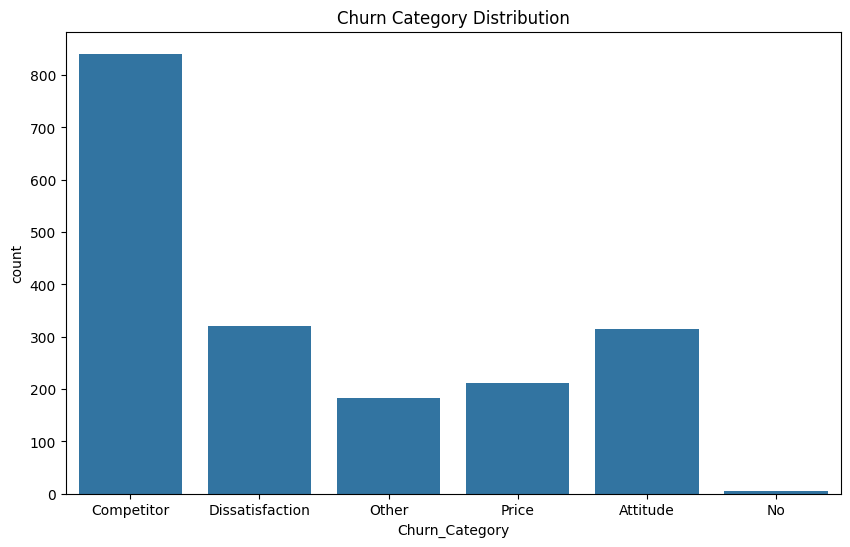

In [6]:

# Visualize count of categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Married')
plt.title('Marital Status Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Churn_Category')
plt.title('Churn Category Distribution')
plt.show()


In [7]:
print(df.isnull().sum())

df = df.dropna()

df = pd.get_dummies(df, columns=['Gender', 'Churn_Category', 'Churn_Reason'], drop_first=True)


Customer_ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number_of_Dependents                    0
City                                    0
Zip_Code                                0
Latitude                                0
Longitude                               0
Number_of_Referrals                     0
Tenure_in_Months                        0
Offer                                   0
Phone_Service                           0
Avg_Monthly_Long_Distance_Charges     682
Multiple_Lines                        682
Internet_Service                        0
Internet_Type                        1526
Avg_Monthly_GB_Download              1526
Online_Security                      1526
Online_Backup                        1526
Device_Protection_Plan               1526
Premium_Tech_Support                 1526
Streaming_TV                         1526
Streaming_Movies                  

In [8]:
X = df[['Monthly_Charge', 'Total_Charges', 'Total_Refunds', 'Total_Long_Distance_Charges', 'Number_of_Referrals']]
y = df['Customer_Status'].apply(lambda x: 1 if x == 'Churned' else 0)  # Binary label for churn

In [9]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_cols = ['Monthly_Charge', 'Total_Charges', 'Total_Refunds', 'Total_Long_Distance_Charges', 'Age']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [11]:
!pip install imblearn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 8.4 MB/s eta 0:00:00


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

cv_scores = cross_val_score(model, X, y, cv=5)

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


/anaconda/envs/azureml_py38/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=4, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best Cross-Validation Accuracy: 1.0


In [22]:
from sklearn.metrics import accuracy_score, classification_report

# Predict and evaluate
y_pred_gs = grid_search.predict(X_test)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gs))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       477

    accuracy                           1.00       477
   macro avg       1.00      1.00      1.00       477
weighted avg       1.00      1.00      1.00       477

